#### Recreate Figure 6 from Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [14]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
import glob

In [15]:
# specific matplotlib settings from my matplotlibrc file
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (9, 8.5)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 1.0
plt.rcParams['axes.titlepad'] = 8.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 12.0
plt.rcParams['ytick.major.size'] = 12.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 9.0
plt.rcParams['ytick.major.pad'] = 5.0
plt.rcParams['xtick.minor.pad'] = 9.0
plt.rcParams['ytick.minor.pad'] = 5.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### Handling i/o; reading in data points

In [16]:
# reading in asas-sn data with errors; modified to Baldry+12 SMF
asassn = ascii.read('../data/asassn_vollim_mod.txt')
asassn_mass = np.array(asassn['massBin'])
asassn_mass = np.power(10, asassn_mass)
asassn_rate = np.array(asassn['relRate'])
low_err = np.array(asassn['relRateErrLow'])
up_err = np.array(asassn['relRateErrUp'])

In [17]:
# reading in asas-sn upper limits; modified to Baldry+12 SMF
asassn_uplim = ascii.read('../data/asassn_vollim_mod_uplims.txt')
asassn_uplim_mass = np.array(asassn_uplim['massBin'])
asassn_uplim_mass = np.power(10, asassn_uplim_mass)
asassn_uplim_uperr = np.array(asassn_uplim['relRateErrUp'])
asassn_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassn_uplim_yerr = [21, 17.5]

In [18]:
# reading in normalised m12i variant data points
m12i_new = ascii.read('../data/m12i_newruns-swb_norm10.txt')

# reading in normalised m11e variant data points
m11e_new = ascii.read('../data/m11e_newruns-swb_norm10.txt')

# reading in normalised m11b variant data points
m11b_new = ascii.read('../data/m11b_newruns-swb_norm10.txt')

In [19]:
# reading in data points for full contours for spread in Ia rate values
rate_contours = ascii.read('../data/SNrates_contours_complete.txt')
rate_contour_mass = rate_contours['stellarMass']
rate_contour_low = rate_contours['low']
rate_contour_high = rate_contours['high']

In [20]:
# different colours and marker shapes and sizes for different run types
colours = ['red', 'orange,' 'brown']
marker_shape = ['o', '*', 'D', 'X', 'v', '^']
marker_size = [250, 450, 180, 300, 270, 270]
marker_label = ['Mannucci+06 DTD (FIRE-2)', 'Maoz+17 DTD', '$\\alpha=-0.5$; $f_{\\rm max}=10\\times$', \
                '$\\alpha=-0.5$; $f_{\\rm max}=100\\times$', '$\\alpha=-1.0$; $f_{\\rm max}=10\\times$', \
                '$\\alpha=-1.0$; $f_{\\rm max}=100\\times$']

#### Plot: relative specific SN Ia rates vs stellar mass

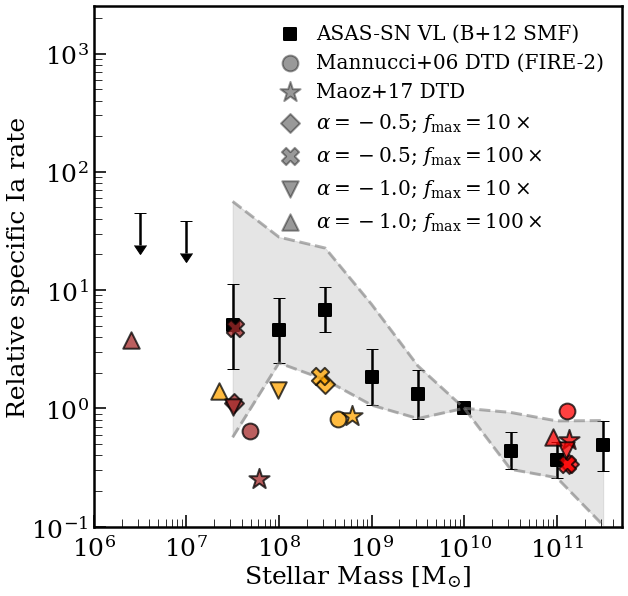

<Figure size 648x612 with 0 Axes>

In [21]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.155, right=0.97, top=0.97, bottom=0.12, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=160, c='k', 
            edgecolors='k', linewidths=2, label='ASAS-SN VL (B+12 SMF)', 
           zorder=1)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), 
            fmt='none', ecolor='k', capsize=6.0, zorder=1, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='k', zorder=1, capsize=6.0, label=None)

# plotting m12i variant data points (normalised)
for i in range(0, len(m12i_new['simID'])):
    ax.scatter(m12i_new['stellarMass'][i], m12i_new['specRate'][i], c='red', \
               marker=marker_shape[i], s=marker_size[i], alpha=0.75, edgecolors='k', \
               linewidths=2, zorder=100000, label=None)

# plotting m11e variant data points (normalised)
for i in range(0, len(m12i_new['simID'])):
    ax.scatter(m11e_new['stellarMass'][i], m11e_new['specRate'][i], c='orange', \
               marker=marker_shape[i], s=marker_size[i], alpha=0.75, edgecolors='k', \
               linewidths=2, zorder=100000, label=None)

# plotting m11b variant data points (normalised)
for i in range(0, len(m12i_new['simID'])):
    ax.scatter(m11b_new['stellarMass'][i], m11b_new['specRate'][i], c='brown', \
               marker=marker_shape[i], s=marker_size[i], alpha=0.75, edgecolors='k', \
               linewidths=2, zorder=100000, label=None)
    
# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)
    
# dummy points for legend
for i in range(0, len(m12i_new['simID'])):
    if(i==0):
        ax.scatter(10**3, 10**10, c='k', marker=marker_shape[i], s=marker_size[i], \
                   alpha=0.4, edgecolors='k', linewidths=2, zorder=100000, \
                   label=marker_label[i])
    else:
        ax.scatter(10**3, 10**10, c='k', marker=marker_shape[i], s=marker_size[i], \
                    alpha=0.4, edgecolors='k', linewidths=2, zorder=100000, \
                    label=marker_label[i])

# specifying rest of plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6, 10**11.7)
ax.set_ylim(10**-1, 10**3.4)
ax.set_xticks(ticks=[10**6, 10**7, 10**8, 10**9, 10**10, 10**11])
ax.legend(prop={'size':20}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()